### Wine Dataset Analysis Summary
### Dataset Overview
The dataset used in this analysis consists of **1,599 wine samples**, each characterized by **12 chemical and quality features**, including:  
- Fixed Acidity  
- Volatile Acidity  
- Citric Acid  
- Residual Sugar  
- Chlorides  
- Free and Total Sulfur Dioxide  
- Density  
- pH  
- Sulphates  
- Alcohol  
- Wine Quality  
All entries in the dataset are **complete**, with **no missing values**.
### Objective
The primary objective of this study was to **analyze the relationship between wine acidity and its pH value**. Specifically, the aim was to determine whether pH could serve as a reliable predictor for the wine’s fixed acidity level.
### Methodology
A **Linear Regression Model** was employed, with:
- **Dependent Variable (Target):** Fixed Acidity  
- **Independent Variable (Feature):** pH  
The model sought to quantify and visualize the relationship between these two chemical parameters.
### Findings
- The model revealed a **negative correlation** between pH and fixed acidity — as **pH increases**, the **fixed acidity decreases**, which aligns with chemical expectations.  
- The **R² value** obtained was **low**, indicating that **pH alone is not a sufficient predictor** of fixed acidity, as acidity is influenced by multiple other wine components.
### Conclusion
This analysis effectively demonstrates the **application of linear regression** in exploring chemical data relationships.  
While the predictive power of the model was limited, it successfully **validated the theoretical inverse relationship between pH and acidity**, and highlighted the importance of evaluating model performance using metrics such as **R²** and **Mean Squared Error (MSE)**.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
df = pd.read_csv("transformed_data_with_header.csv")

In [17]:
print("--- Original DataFrame (First 5 Rows) ---")
df.head()

--- Original DataFrame (First 5 Rows) ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
print("\nDataFrame Information")
df.info()



DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:

X = df[['pH']]
y = df['fixed acidity']
print(f"\nSelected Independent Variable (X): 'pH'")
print(f"Selected Dependent Variable (y): 'fixed acidity'")


Selected Independent Variable (X): 'pH'
Selected Dependent Variable (y): 'fixed acidity'


In [20]:

model = LinearRegression()
model.fit(X, y) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:

y_pred = model.predict(X)


r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

In [22]:
print("\n--- Model Coefficients ---")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient for pH: {model.coef_[0]:.4f}") # The slope of the regression line

print("\n--- Model Performance Metrics (on the full dataset) ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


--- Model Coefficients ---
Intercept: 33.8228
Coefficient for pH: -7.7023

--- Model Performance Metrics (on the full dataset) ---
R-squared (R²): 0.4665
Mean Squared Error (MSE): 1.6164


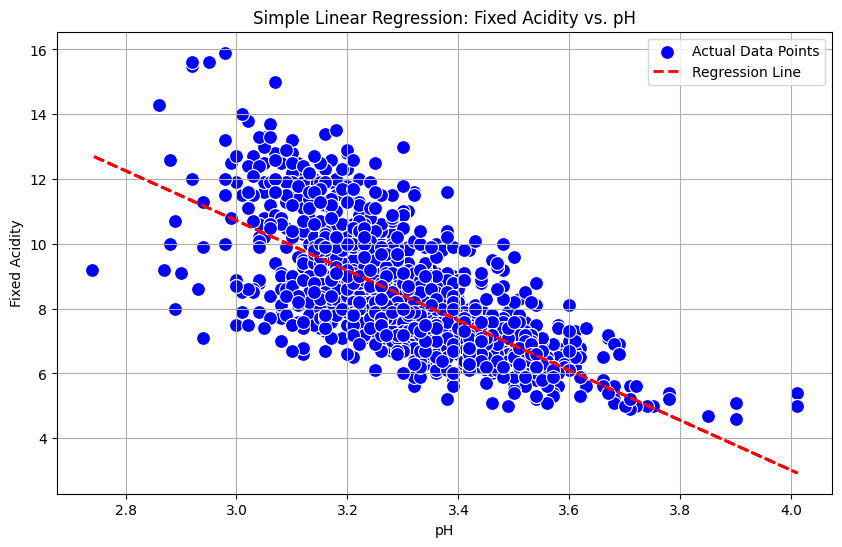

In [23]:

plt.figure(figsize=(10, 6))


sns.scatterplot(x=X['pH'], y=y, label='Actual Data Points', color='blue', s=100)

plt.plot(X['pH'], y_pred, color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.title('Simple Linear Regression: Fixed Acidity vs. pH')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.grid(True)
plt.show()

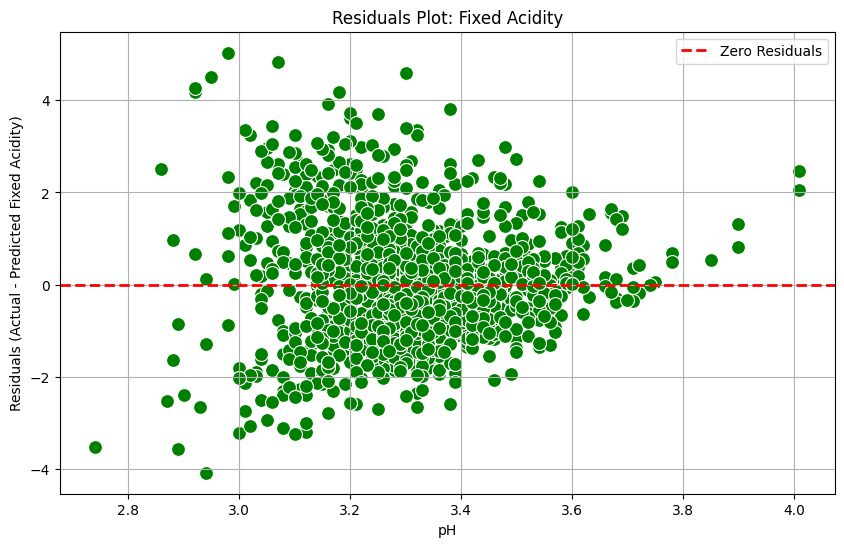

In [24]:

residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['pH'], y=residuals, color='green', s=100)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title('Residuals Plot: Fixed Acidity')
plt.xlabel('pH')
plt.ylabel('Residuals (Actual - Predicted Fixed Acidity)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
new_pH = 3.30
predicted_fixed_acidity = model.predict([[new_pH]])
print(f"\n Prediction Example ")
print(f"For a pH of {new_pH}, the predicted fixed acidity is: {predicted_fixed_acidity[0]:.4f}")


 Prediction Example 
For a pH of 3.3, the predicted fixed acidity is: 8.4052


c:\Users\sit.lab4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The dataset used in this analysis contains 1,599 samples of wine, each described by 12 features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulfur dioxide, density, pH, sulphates, alcohol, and wine quality. All the data entries are complete, meaning there are no missing values.

The main goal of the study was to understand the relationship between wine acidity and its pH value. A linear regression model was used to predict fixed acidity (dependent variable) based on pH (independent variable). The model found a negative relationship between these two features — meaning, as the pH level increases (less acidic), the fixed acidity decreases.

The model’s results showed a small R² value, suggesting that pH alone is not enough to accurately predict fixed acidity, as acidity depends on several other chemical components in the wine. Still, the analysis helped visualize and confirm the expected chemical relationship between pH and acidity.

Overall, this experiment successfully demonstrates how linear regression can be applied to real-world chemical data, and how model performance metrics like R² and MSE help evaluate prediction quality.